# Examples of using different regressors
1. **OLS**
2. **Multilinear rgression**
3. **Use regression for data imputation**
    - regression
    - knn regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# OLS

In [2]:
from regression_algorithms.regressions import OLS
from regression_algorithms.metrics import *

#### create data

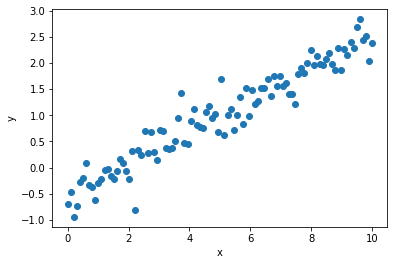

In [3]:
X = np.linspace(0, 10, 100)
y = 0.3 * X - 0.5 + np.random.normal(0, 0.3, size=X.shape)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, y, 'o')
plt.show()

#### fit a line

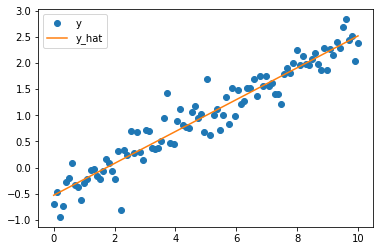

In [4]:
ols = OLS()
ols.fit(X, y)
y_hat = X*ols.w_1+ols.w_0
plt.plot(X, y, 'o', label='y')
plt.plot(X, y_hat, label='y_hat')
plt.legend()
plt.show()

#### metric

In [5]:
r2 = r_square(y, y_hat)
mse = mean_square_error(y, y_hat)
print(f'R square: {r2}')
print(f'MSE: {mse}')

R square: 0.9218653005639179
MSE: 0.06723974738761002


# Multilinear Regression

In [6]:
from regression_algorithms.regressions import MultiLinearRegressor
from mpl_toolkits.mplot3d import Axes3D

#### create data

In [7]:
coeffs = [0.3, -0.6]
X1 = np.linspace(0, 10, 100)
X2 = np.linspace(-2, 5, 100)
y = coeffs[0] * X1 + coeffs[1] * X2 + + np.random.normal(0, 0.5, size=X1.shape)

#### plot data

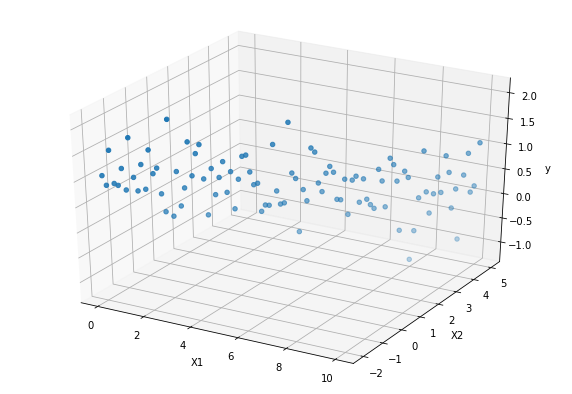

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

#### fit a line, and plot

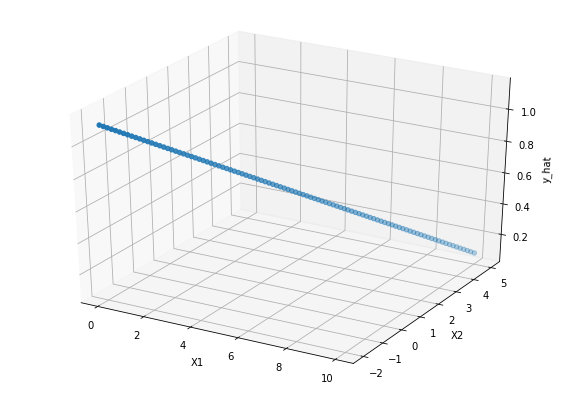

In [9]:
mlr = MultiLinearRegressor()
mlr.fit(np.c_[X1, X2], y)
y_hat = mlr.predict(np.c_[X1, X2])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y_hat, marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y_hat')
plt.show()

In [10]:
print(f'real weights: {coeffs}')
print(f'learned weights: {mlr.weights}')

real weights: [0.3, -0.6]
learned weights: [ 0.28854013 -0.55840336]


# Use Regression for Data Imputation

In [11]:
from regression_algorithms.regressions import Regressor
import pandas as pd

#### create data

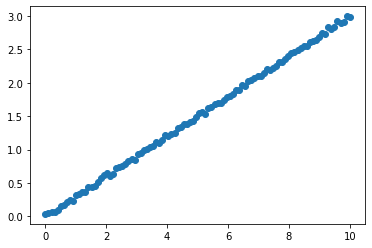

In [12]:
X1 = np.linspace(0, 10, 100)
y = 0.3 * X1 + np.random.normal(0, 0.02, size=X1.shape)
plt.plot(X1, y, 'o')
plt.show()

#### create missing data

In [13]:
df = pd.DataFrame(data={'x1': X1, 'y': y, 'y_for_impute': y})
df.loc[[10, 20, 50], 'y_for_impute'] = None
index = df['y_for_impute'].isnull()
df[index]

,x1,y,y_for_impute
10,1.010101,0.319474,NaN
20,2.020202,0.646323,NaN
50,5.050505,1.547956,NaN


## use regression imputing data

In [14]:
# remove missing data in this case
new_df = df.copy().dropna().reset_index(drop=True)
# fit data into the model
reg = Regressor()
reg.fit(new_df.to_numpy()[:,0].reshape((-1,1)), new_df.to_numpy()[:,-1].reshape((-1, 1)))
# impute data
xs = df[index].to_numpy()[:,0].reshape((-1, 1))
y_impute = reg.predict(xs, k=5)
df.loc[index, 'y_for_impute'] = y_impute
df[index]

,x1,y,y_for_impute
10,1.010101,0.319474,0.296365
20,2.020202,0.646323,0.622385
50,5.050505,1.547956,1.500217


## use knn regression imputing data

In [15]:
from regression_algorithms.regressions import KNNRegressor

In [16]:
# remove missing data in this case
new_df = df.copy().dropna().reset_index(drop=True)
# fit data into the model
knnreg = KNNRegressor()
knnreg.fit(new_df.to_numpy()[:,0].reshape((-1,1)), new_df.to_numpy()[:,-1].reshape((-1, 1)))
# impute data
xs = df[index].to_numpy()[:,0].reshape((-1, 1))
y_impute = knnreg.predict(xs, k=5)
df.loc[index, 'y_for_impute'] = y_impute
df[index]

,x1,y,y_for_impute
10,1.010101,0.319474,0.293311
20,2.020202,0.646323,0.613094
50,5.050505,1.547956,1.502520
